In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
SAVE_FIGURES = True

***
# __Travel Density - Full Data__
***

In [3]:
full_data_TravelDensity = pd.read_csv('../data/complete_sets/full_pm25.csv')
full_data_TravelDensity.set_index('datetime-America/Los_Angeles', inplace=True)
full_data_TravelDensity.info()
full_data_TravelDensity

<class 'pandas.core.frame.DataFrame'>
Index: 2991 entries, 2021-05-21 12:30:00-07:00 to 2021-06-27 23:30:00-07:00
Data columns (total 26 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Iowa PM2.5 [ug/m3]                 2991 non-null   float64
 1   Chicago PM2.5 [ug/m3]              2991 non-null   float64
 2   Cranford PM2.5 [ug/m3]             2991 non-null   float64
 3   Magnolia PM2.5 [ug/m3]             2991 non-null   float64
 4   year                               2991 non-null   int64  
 5   month                              2991 non-null   int64  
 6   day                                2991 non-null   int64  
 7   dayofweek_Sunday                   2991 non-null   int64  
 8   dayofweek_Monday                   2991 non-null   int64  
 9   dayofweek_Tuesday                  2991 non-null   int64  
 10  dayofweek_Wednesday                2991 non-null   int64  
 11  dayofweek_Thursd

,Iowa PM2.5 [ug/m3],Chicago PM2.5 [ug/m3],Cranford PM2.5 [ug/m3],Magnolia PM2.5 [ug/m3],year,month,day,dayofweek_Sunday,dayofweek_Monday,dayofweek_Tuesday,...,humidity,wind_speed,wind_deg,PM2.5 Background [ug/m3],Density Local 1 (#Vehicles/mile),Density Local 2 (#Vehicles/mile),Density Local 9 (#Vehicles/mile),Density Local 10 (#Vehicles/mile),Density Fwy 1 (#Vehicles/mile),Density Fwy 2 (#Vehicles/mile)
datetime-America/Los_Angeles,,,,,,,,,,,,,,,,,,,,,
2021-05-21 12:30:00-07:00,10.098479,10.554006,11.389642,10.541899,2021,5,21,0,0,0,...,30,2.68,260,-1.0,42.761836,32.168858,50.995674,75.761516,71.716630,89.258290
2021-05-21 12:45:00-07:00,10.037741,10.541679,11.378493,10.566399,2021,5,21,0,0,0,...,30,2.68,260,-1.0,36.143933,32.407146,41.190012,58.508766,77.473148,96.422835
2021-05-21 13:00:00-07:00,9.977003,10.529352,11.367343,10.590900,2021,5,21,0,0,0,...,26,3.13,306,3.0,37.388800,31.548108,52.088439,73.269642,74.985160,93.255766
2021-05-21 13:15:00-07:00,9.916265,10.517026,11.356194,10.615401,2021,5,21,0,0,0,...,26,3.13,306,3.0,36.866897,37.989890,49.953555,72.978745,78.578698,97.724893
2021-05-21 13:30:00-07:00,9.943220,10.504699,11.345044,10.639901,2021,5,21,0,0,0,...,26,3.13,306,3.0,35.844480,37.593411,42.853508,60.609213,76.662144,95.341359
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-06-27 21:30:00-07:00,5.343054,6.868561,8.385721,6.286515,2021,6,27,1,0,0,...,60,0.89,181,11.0,17.637760,15.767046,18.489341,23.896320,70.891572,71.581869
2021-06-27 22:00:00-07:00,5.339244,6.870527,8.392662,6.286515,2021,6,27,1,0,0,...,62,1.34,233,11.0,12.801600,12.615239,14.585776,21.714594,53.028032,59.461914
2021-06-27 22:30:00-07:00,5.335434,6.872493,8.399603,6.286515,2021,6,27,1,0,0,...,62,1.34,233,11.0,14.352337,13.766629,16.362248,26.865179,53.637550,60.145385


***
> ## __Traffic Density - Clarity Sensors__
***

In [4]:
pm25_TravelDensity = full_data_TravelDensity.iloc[:, :4]
pm25_TravelDensity.rename(columns={
    'Iowa PM2.5 [ug/m3]'    : 'Iowa',
    'Chicago PM2.5 [ug/m3]' : 'Chicago',
    'Magnolia PM2.5 [ug/m3]': 'Magnolia',
    'Cranford PM2.5 [ug/m3]': 'Cranford'
}, inplace=True)
pm25_TravelDensity_melt = pd.melt(pm25_TravelDensity, var_name='Clarity Sensor', value_name='Sensor Readings')
pm25_TravelDensity_melt.info()
pm25_TravelDensity_melt

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11964 entries, 0 to 11963
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Clarity Sensor   11964 non-null  object 
 1   Sensor Readings  11964 non-null  float64
dtypes: float64(1), object(1)
memory usage: 187.1+ KB


,Clarity Sensor,Sensor Readings
0,Iowa,10.098479
1,Iowa,10.037741
2,Iowa,9.977003
3,Iowa,9.916265
4,Iowa,9.943220
...,...,...
11959,Magnolia,6.286515
11960,Magnolia,6.286515
11961,Magnolia,6.286515
11962,Magnolia,6.286515


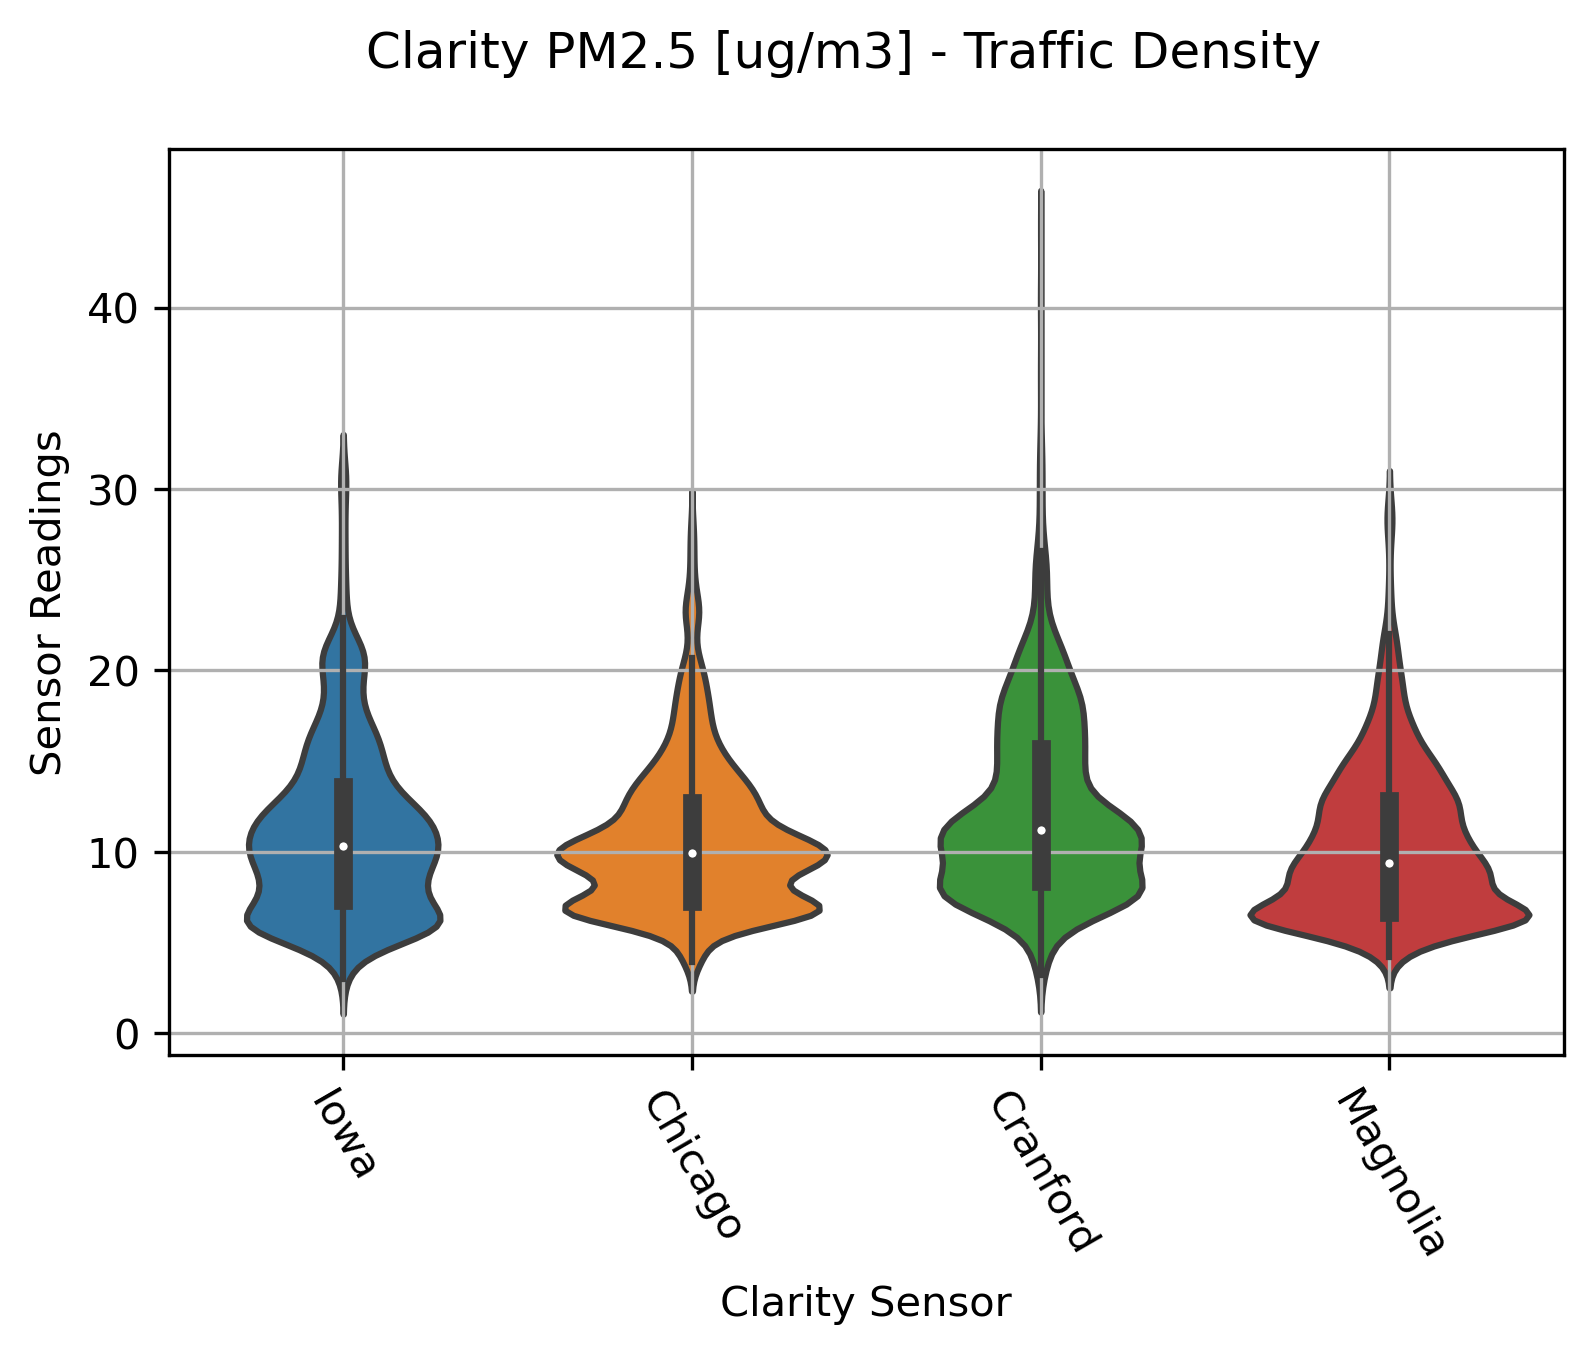

In [5]:
fig_pm25_TrafficDensity, ax_pm25_TrafficDensity = plt.subplots(dpi=300)
sns.violinplot(ax=ax_pm25_TrafficDensity, data=pm25_TravelDensity_melt, x='Clarity Sensor', y='Sensor Readings')
ax_pm25_TrafficDensity.tick_params(axis='x', labelrotation=300)
ax_pm25_TrafficDensity.grid()
fig_pm25_TrafficDensity.suptitle('Clarity PM2.5 [ug/m3] - Traffic Density')
if SAVE_FIGURES:
    fig_pm25_TrafficDensity.savefig('../graphs/traffic_density/clarity_violin.png', dpi=300)

***
> # __Traffic Density - Meteorological Conditions__
***

In [6]:
meteorology_TrafficDensity = full_data_TravelDensity.loc[:, 'temp':'wind_deg']
meteorology_TrafficDensity.info()
meteorology_TrafficDensity

<class 'pandas.core.frame.DataFrame'>
Index: 2991 entries, 2021-05-21 12:30:00-07:00 to 2021-06-27 23:30:00-07:00
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   temp        2991 non-null   float64
 1   pressure    2991 non-null   int64  
 2   humidity    2991 non-null   int64  
 3   wind_speed  2991 non-null   float64
 4   wind_deg    2991 non-null   int64  
dtypes: float64(2), int64(3)
memory usage: 140.2+ KB


,temp,pressure,humidity,wind_speed,wind_deg
datetime-America/Los_Angeles,,,,,
2021-05-21 12:30:00-07:00,19.91,1015,30,2.68,260
2021-05-21 12:45:00-07:00,19.91,1015,30,2.68,260
2021-05-21 13:00:00-07:00,21.14,1014,26,3.13,306
2021-05-21 13:15:00-07:00,21.14,1014,26,3.13,306
2021-05-21 13:30:00-07:00,21.14,1014,26,3.13,306
...,...,...,...,...,...
2021-06-27 21:30:00-07:00,25.48,1005,60,0.89,181
2021-06-27 22:00:00-07:00,24.69,1006,62,1.34,233
2021-06-27 22:30:00-07:00,24.69,1006,62,1.34,233


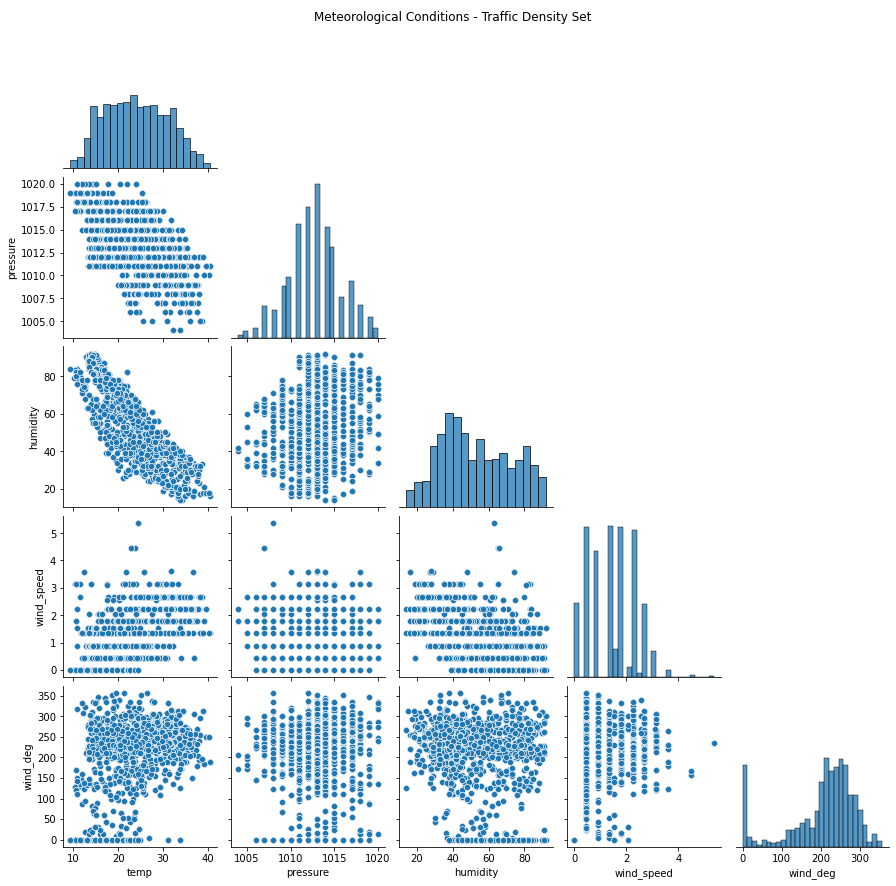

In [7]:
meteorology_TrafficDensity_pairplot = sns.pairplot(data=meteorology_TrafficDensity, corner=True)
fig_meteorology_TrafficDensity = meteorology_TrafficDensity_pairplot.fig
fig_meteorology_TrafficDensity.suptitle('Meteorological Conditions - Traffic Density Set')
if SAVE_FIGURES:
    fig_meteorology_TrafficDensity.savefig('../graphs/traffic_density/meteorological_conditions_pairplot.png', dpi=300)

***
> # __Traffic Density__
***

In [8]:
traffic_density = full_data_TravelDensity.iloc[:, 20:]
traffic_density.rename(columns=lambda x: x[8:], inplace=True)
traffic_density.rename(columns=lambda x: x[:-17], inplace=True)
traffic_density.info()
traffic_density

<class 'pandas.core.frame.DataFrame'>
Index: 2991 entries, 2021-05-21 12:30:00-07:00 to 2021-06-27 23:30:00-07:00
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Local 1   2991 non-null   float64
 1   Local 2   2991 non-null   float64
 2   Local 9   2991 non-null   float64
 3   Local 10  2991 non-null   float64
 4   Fwy 1     2991 non-null   float64
 5   Fwy 2     2991 non-null   float64
dtypes: float64(6)
memory usage: 228.1+ KB


,Local 1,Local 2,Local 9,Local 10,Fwy 1,Fwy 2
datetime-America/Los_Angeles,,,,,,
2021-05-21 12:30:00-07:00,42.761836,32.168858,50.995674,75.761516,71.716630,89.258290
2021-05-21 12:45:00-07:00,36.143933,32.407146,41.190012,58.508766,77.473148,96.422835
2021-05-21 13:00:00-07:00,37.388800,31.548108,52.088439,73.269642,74.985160,93.255766
2021-05-21 13:15:00-07:00,36.866897,37.989890,49.953555,72.978745,78.578698,97.724893
2021-05-21 13:30:00-07:00,35.844480,37.593411,42.853508,60.609213,76.662144,95.341359
...,...,...,...,...,...,...
2021-06-27 21:30:00-07:00,17.637760,15.767046,18.489341,23.896320,70.891572,71.581869
2021-06-27 22:00:00-07:00,12.801600,12.615239,14.585776,21.714594,53.028032,59.461914
2021-06-27 22:30:00-07:00,14.352337,13.766629,16.362248,26.865179,53.637550,60.145385


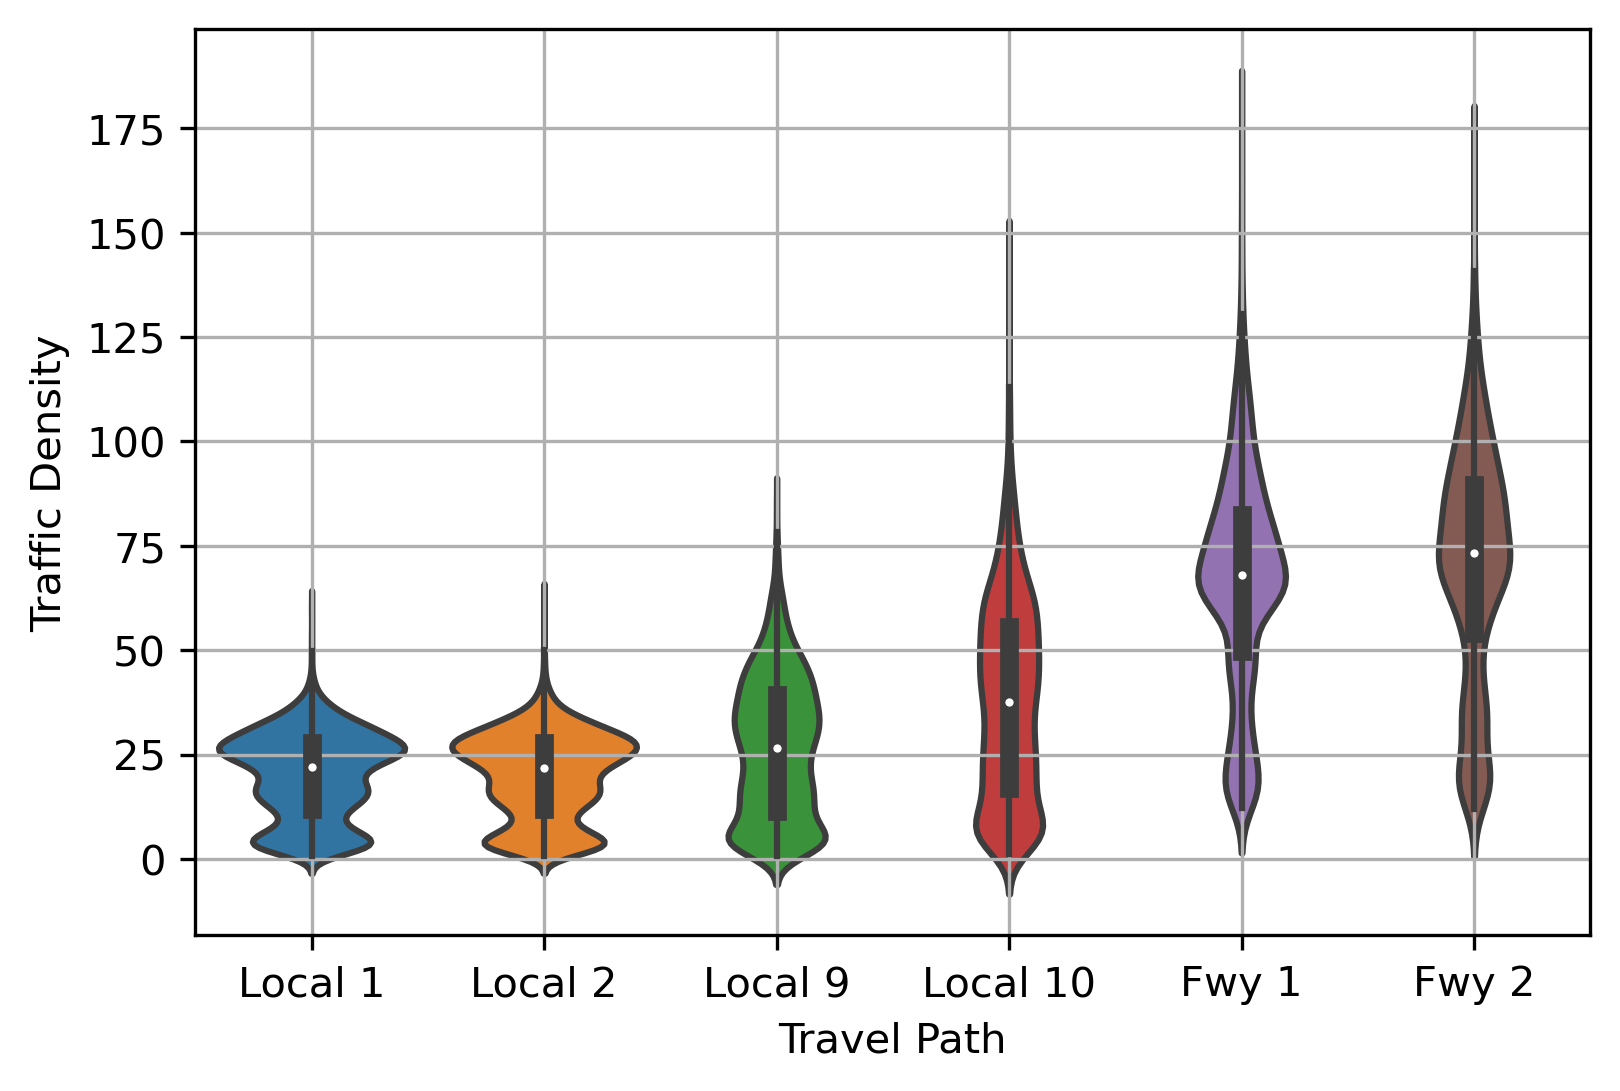

In [9]:
fig_TrafficDensity, ax_TrafficDensity = plt.subplots(dpi=300)
traffic_density_melt = pd.melt(traffic_density, var_name='Travel Path', value_name='Traffic Density')
sns.violinplot(data=traffic_density_melt, x='Travel Path', y='Traffic Density', ax=ax_TrafficDensity)
ax_TrafficDensity.grid()

In [10]:
fig_tDensity_vs_pm25, ax_tDensity_vs_pm25 = plt.subplots(nrows=3, ncols=3, dpi=300)
for y in range(3):
    for x in range(3):



SyntaxError: unexpected EOF while parsing (Temp/ipykernel_25216/2441461796.py, line 3)

***
# __Full Data with Travel Time__
***

In [ ]:
full_data_TravelTime = pd.read_csv('../data/complete_sets/full_pm25_TravelTime.csv')
full_data_TravelTime.info()
full_data_TravelTime